# Introduction – Modélisation par Réseau Bayésien

Dans le cadre de ce projet, l’objectif est de construire un modèle probabiliste sous forme de **réseau bayésien**, permettant de modéliser et prédire un phénomène complexe basé sur plusieurs variables interdépendantes.  

Ce travail se base sur mes expérience en tant qu’**alternant ingénieur IA et développeur Full-Stack**.  

Le sujet retenu porte sur la **prédiction de la réussite d’un déploiement de fonctionnalité en production**. Cette situation courante dans le monde du développement logiciel implique de nombreux facteurs techniques, organisationnels et humains. L'utilisation d’un réseau bayésien permet ici de modéliser ces influences multiples, et d'estimer la probabilité qu’un déploiement se passe sans incident en fonction de différents scénarios.

# Question 1 – Variables discrètes

Proposez 5 à 10 variables discrètes pertinentes pour ce modèle (et leur domaine de définition).
ASTUCE : Pour vous simplifier la vie dans la question suivante, n’utilisez que des variables prenant 2 ou 3 valeurs.

# Réponse 1

| **Nom des variables**      | **Description**                                                                            | **Valeurs**                                  | **Catégorie**               |
|----------------------------|--------------------------------------------------------------------------------------------|----------------------------------------------|-----------------------------|
| `Developer_Experience`     | Niveau d'expérience du développeur                                                         | `Beginner`, `Intermediate`, `Expert`         | Variable d'entrée           |
| `Code_Review`              | Le code a-t-il été relu par un pair                                                        | `No`, `Yes`                                  | Variable d'entrée           |
| `Technical_Documentation`  | Qualité de la documentation technique                                                      | `Poor`, `Average`, `Good`                    | Variable d'entrée           |
| `Automated_Tests`          | Présence de tests automatisés                                                              | `No`, `Yes`                                  | Variable d'entrée           |
| `Test_Coverage`            | Couverture globale des tests                                                               | `Low`, `Medium`, `High`                      | Variable d'entrée           |
| `Unit_Tests_Result`        | Résultat des tests unitaires                                                               | `Failed`, `Not_Run`, `Passed`                | Variable d'entrée           |
| `Preprod_Available`        | Disponibilité d’un environnement de préproduction                                          | `No`, `Yes`                                  | Variable d'entrée           |
| `Time_Pressure`            | Niveau de pression temporelle lors du déploiement                                          | `Low`, `Moderate`, `High`                    | Variable d'entrée           |
| `Known_Bugs`               | Présence de bugs connus au moment du déploiement                                           | `No`, `Yes`                                  | Variable d'entrée           |
| `Automated_Deployment`     | Le déploiement est-il automatisé (pipeline CI/CD)                                          | `No`, `Yes`                                  | Variable d'entrée           |
| `Deployment_Time`          | Moment prévu pour le déploiement                                                           | `Business_Hours`, `Evening`, `Weekend`       | Variable d'entrée           |
| `Technical_Preparation`    | Qualité de la préparation technique (selon l’expérience, revue de code, documentation...)  | `No`, `Yes`                                  | **Variable intermédiaire**  |
| `Test_Quality`             | Niveau de confiance dans la stratégie de test                                              | `No`, `Yes`                                  | **Variable intermédiaire**  |
| `Undetected_Bugs`          | Présence de problèmes non détectés avant la production                                     | `No`, `Yes`                                  | **Variable intermédiaire**  |
| `Successful_Deployment`    | Résultat final du déploiement (succès ou échec)                                            | `No`, `Yes`                                  | **Variable cible**          |

# Question 2 – Graphe du réseau bayésien

Proposez le graphe d’un réseau bayésien modélisant ce problème, à partir des variables identifiées, en justifiant le choix de ce graphe.
ASTUCE : Pour éviter d’avoir une variable avec trop de parents, n’hésitez pas à rajouter des variables intermédiaires.

# Réponse 2

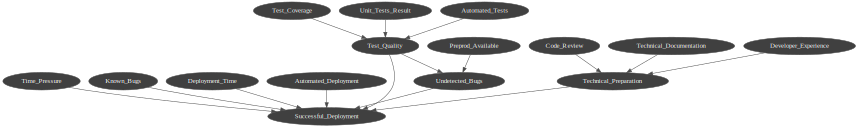

In [7]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb


# Créer un réseau bayésien
bn = gum.BayesNet('Production_Deployment')

## Ajouter des variables

### Variables d'entrée
bn.add(gum.LabelizedVariable("Developer_Experience", "", ["Beginner", "Intermediate", "Expert"]))
bn.add(gum.LabelizedVariable("Code_Review", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Technical_Documentation", "", ["Poor", "Average", "Good"]))

bn.add(gum.LabelizedVariable("Automated_Tests", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Test_Coverage", "", ["Low", "Medium", "High"]))
bn.add(gum.LabelizedVariable("Unit_Tests_Result", "", ["Failed", "Not_Run", "Passed"]))

bn.add(gum.LabelizedVariable("Preprod_Available", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Time_Pressure", "", ["Low", "Moderate", "High"]))
bn.add(gum.LabelizedVariable("Known_Bugs", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Automated_Deployment", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Deployment_Time", "", ["Business_Hours", "Evening", "Weekend"]))

### Variables intermédiaires
bn.add(gum.LabelizedVariable("Technical_Preparation", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Test_Quality", "", ["No", "Yes"]))
bn.add(gum.LabelizedVariable("Undetected_Bugs", "", ["No", "Yes"]))

### Variable de sortie
bn.add(gum.LabelizedVariable("Successful_Deployment", "", ["No", "Yes"]))

## Ajouter des arcs

### Technical_Preparation
bn.addArc("Developer_Experience", "Technical_Preparation")
bn.addArc("Code_Review", "Technical_Preparation")
bn.addArc("Technical_Documentation", "Technical_Preparation")

### Test_Quality
bn.addArc("Automated_Tests", "Test_Quality")
bn.addArc("Test_Coverage", "Test_Quality")
bn.addArc("Unit_Tests_Result", "Test_Quality")

### Undetected_Bugs
bn.addArc("Preprod_Available", "Undetected_Bugs")
bn.addArc("Test_Quality", "Undetected_Bugs")

### Successful_Deployment
bn.addArc("Technical_Preparation", "Successful_Deployment")
bn.addArc("Test_Quality", "Successful_Deployment")
bn.addArc("Undetected_Bugs", "Successful_Deployment")
bn.addArc("Time_Pressure", "Successful_Deployment")
bn.addArc("Known_Bugs", "Successful_Deployment")
bn.addArc("Automated_Deployment", "Successful_Deployment")
bn.addArc("Deployment_Time", "Successful_Deployment") 

# Afficher le réseau bayésien
gnb.showBN(bn, size="12!")

# Question 3 – Probabilités conditionnelles

Proposez des distribution de probabilité conditionnelles pour vos variables, afin de définir entièrement le réseau bayésien, en justifiant le choix des valeurs numériques de ces distributions. Essayez d’avoir au moins une application du NoisyOR dans votre modèle.

# Réponse 3

## 1. Distributions de probabilité a priori

| **Variable**                | **Valeurs**                              | **Distribution**                       |
|-----------------------------|------------------------------------------|------------------------------------------------|
| `Developer_Experience`      | `Beginner`, `Intermediate`, `Expert`     | `[0.3, 0.5, 0.2]`                              |
| `Code_Review`               | `No`, `Yes`                              | `[0.75, 0.25]`                                 |
| `Technical_Documentation`   | `Poor`, `Average`, `Good`                | `[0.8, 0.2, 0.1]`                              |
| `Automated_Tests`           | `No`, `Yes`                              | `[1.0, 0.0]`                                   |
| `Test_Coverage`             | `Low`, `Medium`, `High`                  | `[1.0, 0.0, 0.0]`                              |
| `Unit_Tests_Result`         | `Failed`, `Not_Run`, `Passed`            | `[0.1, 0.7, 0.2]`                              |
| `Preprod_Available`         | `No`, `Yes`                              | `[0.15, 0.85]`                                 |
| `Time_Pressure`             | `Low`, `Moderate`, `High`                | `[0.5, 0.4, 0.1]`                              |
| `Known_Bugs`                | `No`, `Yes`                              | `[0.3, 0.7]`                                   |
| `Automated_Deployment`      | `No`, `Yes`                              | `[1.0, 0.0]`                                   |
| `Deployment_Time`           | `Business_Hours`, `Evening`, `Weekend`   | `[0.7, 0.3, 0.0]`                              |

Les distributions de probabilité à priori sont basées sur une intuition réaliste et sur mes expériences. Par exemple, la complexité des fonctionnalités est souvent simple ou moyenne, et la plupart des développeurs sont de niveau intermédiaires. La documentation technique est généralement de qualité pauvre.

## 2. Distributions de probabilité conditionnelles

### 2.1 `Technical_Preparation` ← (Developer_Experience, Code_Review, Technical_Documentation)

#### Méthode utilisée : **Scoring**
Chaque modalité des variables parents est convertie en un score selon son impact positif sur la qualité de la préparation technique :

| **Variable**                    | **Score attribué**                         |
|---------------------------------|--------------------------------------------|
| `Developer_Experience`          | Beginner = 0, Intermediate = 1, Expert = 2 |
| `Code_Review`                   | Yes = 1, No = 0                            |
| `Technical_Documentation`       | Poor = 0, Average = 1, Good = 2            |

Ensuite, le **score total** est utilisé pour estimer la probabilité :

| Score total | P(Technical_Preparation = Yes) |
|-------------|--------------------------------|
| ≥ 0         | 0.2                            |
| ≥ 1         | 0.4                            |
| ≥ 2         | 0.6                            |
| ≥ 3         | 0.8                            |
| ≥ 4         | 0.95                           |

#### Tableau complet :

| Developer_Experience | Code_Review | Technical_Documentation  | P(Yes) | P(No) |
|----------------------|-------------|--------------------------|--------|-------|
| Beginner             | No          | Poor                     | 0.2    | 0.8   |
| Beginner             | No          | Average                  | 0.4    | 0.6   |
| Beginner             | No          | Good                     | 0.6    | 0.4   |
| Beginner             | Yes         | Poor                     | 0.4    | 0.6   |
| Beginner             | Yes         | Average                  | 0.6    | 0.4   |
| Beginner             | Yes         | Good                     | 0.8    | 0.2   |
| Intermediate         | No          | Poor                     | 0.4    | 0.6   |
| Intermediate         | No          | Average                  | 0.6    | 0.4   |
| Intermediate         | No          | Good                     | 0.8    | 0.2   |
| Intermediate         | Yes         | Poor                     | 0.6    | 0.4   |
| Intermediate         | Yes         | Average                  | 0.8    | 0.2   |
| Intermediate         | Yes         | Good                     | 0.95   | 0.05  |
| Expert               | No          | Poor                     | 0.6    | 0.4   |
| Expert               | No          | Average                  | 0.8    | 0.2   |
| Expert               | No          | Good                     | 0.95   | 0.05  |
| Expert               | Yes         | Poor                     | 0.8    | 0.2   |
| Expert               | Yes         | Average                  | 0.95   | 0.05  |
| Expert               | Yes         | Good                     | 0.95   | 0.05  |

### 2.2 `Test_Quality` ← (Automated_Tests, Test_Coverage, Unit_Tests_Result)

#### Méthode utilisée : **Scoring**

| **Variable**                 | **Score attribué**                    |
|------------------------------|---------------------------------------|
| `Automated_Tests`            | Yes = 1, No = 0                       |
| `Test_Coverage`              | Low = 0, Medium = 1, High = 2         |
| `Unit_Tests_Result`          | Failed = 0, Not_Run = 0.5, Passed = 2 |

Ensuite, le **score total** est utilisé pour estimer la probabilité :

| Score total | P(Test_Quality = Yes)  |
|-------------|------------------------|
| ≥ 0         | 0.1                    |
| ≥ 1         | 0.4                    |
| ≥ 2         | 0.6                    |
| ≥ 3         | 0.8                    |
| ≥ 4         | 0.95                   |

#### Tableau complet :

| Automated_Tests  | Test_Coverage  | Unit_Tests_Result  | P(Yes) | P(No) |
|------------------|----------------|--------------------|--------|-------|
| No               | Low            | Failed             | 0.1    | 0.9   |
| No               | Low            | Not_Run            | 0.4    | 0.6   |
| No               | Low            | Passed             | 0.6    | 0.4   |
| No               | Medium         | Failed             | 0.4    | 0.6   |
| No               | Medium         | Not_Run            | 0.6    | 0.4   |
| No               | Medium         | Passed             | 0.8    | 0.2   |
| No               | High           | Failed             | 0.6    | 0.4   |
| No               | High           | Not_Run            | 0.8    | 0.2   |
| No               | High           | Passed             | 0.95   | 0.05  |
| Yes              | Low            | Failed             | 0.4    | 0.6   |
| Yes              | Low            | Not_Run            | 0.6    | 0.4   |
| Yes              | Low            | Passed             | 0.8    | 0.2   |
| Yes              | Medium         | Failed             | 0.6    | 0.4   |
| Yes              | Medium         | Not_Run            | 0.8    | 0.2   |
| Yes              | Medium         | Passed             | 0.95   | 0.05  |
| Yes              | High           | Failed             | 0.8    | 0.2   |
| Yes              | High           | Not_Run            | 0.95   | 0.05  |
| Yes              | High           | Passed             | 0.95   | 0.05  |

### 2.3 `Undetected_Bugs` ← (Preprod_Available, Test_Quality)

#### Méthode utilisée : **NoisyOR**

Chaque cause (parent) a une **probabilité indépendante** (basé sur une intuition réaliste) de provoquer `Undetected_Bugs` :

| Parent                 | Influence (proba)  |
|------------------------|--------------------|
| `Preprod_Available`    | 0.5                |
| `Test_Quality`         | 0.6                |

Le calcul est fait selon la formule du NoisyOR :

```
P(No) = (1 - p1) × (1 - p2)
P(Yes) = 1 - P(No)
```

#### Tableau complet :

| Preprod_Available | Test_Quality | P(Yes) | P(No) |
|-------------------|--------------|--------|-------|
| No                | No           | 0.8    | 0.2   |
| No                | Yes          | 0.5    | 0.5   |
| Yes               | No           | 0.6    | 0.4   |
| Yes               | Yes          | 0.0    | 1.0   |

### 2.4 `Successful_Deployment` ← (Technical_Preparation, Test_Quality, Undetected_Bugs, Time_Pressure, Known_Bugs, Automated_Deployment, Deployment_Time)

#### Méthode utilisée : **Scoring pondéré**

Chaque variable parent contribue de manière positive ou null à la réussite du déploiement.  
On attribue un **score binaire** (0 ou 1) à chaque parent selon son état, puis on additionne tous les scores.

| **Parent**               | **État favorable**          | Score |
|--------------------------|-----------------------------|-------|
| `Technical_Preparation`  | Yes                         | +1    |
| `Test_Quality`           | Yes                         | +1    |
| `Undetected_Bugs`        | No                          | +1    |
| `Time_Pressure`          | Low                         | +1    |
| `Known_Bugs`             | No                          | +1    |
| `Automated_Deployment`   | Yes                         | +1    |
| `Deployment_Time`        | Business_Hours              | +1    |

On associe à chaque score un niveau de confiance dans le succès :

| Score total | P(Successful_Deployment = Yes) |
|-------------|--------------------------------|
| ≥ 0         | 0.05                           |
| ≥ 2         | 0.4                            |
| ≥ 4         | 0.7                            |
| ≥ 6         | 0.9                            |
| ≥ 7         | 0.98                           |

# Question 4 – Implémentation

Implémentez votre modèle avec pyAgrum, et montrez la "qualité" de votre modèle en observant la probabilité de réussite dans différents scénarios possibles, du pire scénario possible, au meilleur, en passant par des situations intermédiaires.

# Réponse 4

In [ ]:
bn.cpt("Developer_Experience").fillWith([0.3, 0.5, 0.2])
bn.cpt("Code_Review").fillWith([0.75, 0.25])
bn.cpt("Technical_Documentation").fillWith([0.8, 0.2, 0.1])
bn.cpt("Automated_Tests").fillWith([1.0, 0.0])
bn.cpt("Test_Coverage").fillWith([1.0, 0.0, 0.0])
bn.cpt("Unit_Tests_Result").fillWith([0.1, 0.7, 0.2])
bn.cpt("Preprod_Available").fillWith([0.15, 0.85])
bn.cpt("Time_Pressure").fillWith([0.5, 0.4, 0.1])
bn.cpt("Known_Bugs").fillWith([0.3, 0.7])
bn.cpt("Automated_Deployment").fillWith([1.0, 0.0])
bn.cpt("Deployment_Time").fillWith([0.7, 0.3, 0.0])

In [9]:
score_map_tech_prep = {
    "Developer_Experience": {
        "Beginner": 0,
        "Intermediate": 1,
        "Expert": 2
    },
    "Code_Review": {
        "No": 0,
        "Yes": 1
    },
    "Technical_Documentation": {
        "Poor": 0,
        "Average": 1,
        "Good": 2
    }
}

def tech_prep_probability(score):
    """Retourne P(Technical_Preparation = Yes) en fonction du score total."""
    if score >= 4:
        return 0.95
    elif score >= 3:
        return 0.8
    elif score >= 2:
        return 0.6
    elif score >= 1:
        return 0.4
    else:
        return 0.2
    
cpt_technical_preparation = []

for dev_exp in score_map_tech_prep["Developer_Experience"]:
    for code_rev in score_map_tech_prep["Code_Review"]:
        for tech_doc in score_map_tech_prep["Technical_Documentation"]:
            total_score = (
                score_map_tech_prep["Developer_Experience"][dev_exp]
                + score_map_tech_prep["Code_Review"][code_rev]
                + score_map_tech_prep["Technical_Documentation"][tech_doc]
            )
            p_yes = tech_prep_probability(total_score)
            p_no = round(1 - p_yes, 2)

            cpt_technical_preparation.append([
                dev_exp, code_rev, tech_doc, p_yes, p_no
            ])

tech_prep_cpt_flat = []
for row in cpt_technical_preparation:
    tech_prep_cpt_flat.extend([row[3], row[4]])

bn.cpt("Technical_Preparation").fillWith(tech_prep_cpt_flat)

(pyagrum.Tensor@0x182cec30) 
                    ||  Technical_Prepara|
Develo|Code_R|Techni||No       |Yes      |
------|------|------||---------|---------|
Beginn|No    |Poor  || 0.2000  | 0.8000  |
Interm|No    |Poor  || 0.4000  | 0.6000  |
Expert|No    |Poor  || 0.6000  | 0.4000  |
Beginn|Yes   |Poor  || 0.4000  | 0.6000  |
Interm|Yes   |Poor  || 0.6000  | 0.4000  |
Expert|Yes   |Poor  || 0.8000  | 0.2000  |
[...6 more line(s) ...]
Beginn|No    |Good  || 0.6000  | 0.4000  |
Interm|No    |Good  || 0.8000  | 0.2000  |
Expert|No    |Good  || 0.9500  | 0.0500  |
Beginn|Yes   |Good  || 0.8000  | 0.2000  |
Interm|Yes   |Good  || 0.9500  | 0.0500  |
Expert|Yes   |Good  || 0.9500  | 0.0500  |

In [10]:
score_map_test_quality = {
    "Automated_Tests": {
        "No": 0,
        "Yes": 1
    },
    "Test_Coverage": {
        "Low": 0,
        "Medium": 1,
        "High": 2
    },
    "Unit_Tests_Result": {
        "Failed": 0,
        "Not_Run": 0.5,
        "Passed": 2
    }
}
 
def test_quality_probability(score):
    """Retourne P(Test_Quality = Yes) en fonction du score total."""
    if score >= 4:
        return 0.95
    elif score >= 3:
        return 0.8
    elif score >= 2:
        return 0.6
    elif score >= 1:
        return 0.4
    else:
        return 0.1

cpt_test_quality = []

for auto_tests in score_map_test_quality["Automated_Tests"]:
    for coverage in score_map_test_quality["Test_Coverage"]:
        for unit_res in score_map_test_quality["Unit_Tests_Result"]:
            total_score = (
                score_map_test_quality["Automated_Tests"][auto_tests]
                + score_map_test_quality["Test_Coverage"][coverage]
                + score_map_test_quality["Unit_Tests_Result"][unit_res]
            )
            p_yes = test_quality_probability(total_score)
            p_no = round(1 - p_yes, 2)

            cpt_test_quality.append([auto_tests, coverage, unit_res, p_yes, p_no])

test_quality_cpt_flat = []
for row in cpt_test_quality:
    test_quality_cpt_flat.extend([row[3], row[4]])

bn.cpt("Test_Quality").fillWith(test_quality_cpt_flat)

(pyagrum.Tensor@0x18ad3770) 
                    ||  Test_Quality     |
Automa|Test_C|Unit_T||No       |Yes      |
------|------|------||---------|---------|
No    |Low   |Failed|| 0.1000  | 0.9000  |
Yes   |Low   |Failed|| 0.1000  | 0.9000  |
No    |Medium|Failed|| 0.6000  | 0.4000  |
Yes   |Medium|Failed|| 0.4000  | 0.6000  |
No    |High  |Failed|| 0.4000  | 0.6000  |
Yes   |High  |Failed|| 0.8000  | 0.2000  |
[...6 more line(s) ...]
No    |Low   |Passed|| 0.6000  | 0.4000  |
Yes   |Low   |Passed|| 0.6000  | 0.4000  |
No    |Medium|Passed|| 0.9500  | 0.0500  |
Yes   |Medium|Passed|| 0.8000  | 0.2000  |
No    |High  |Passed|| 0.8000  | 0.2000  |
Yes   |High  |Passed|| 0.9500  | 0.0500  |

In [11]:
p_preprod_no = 0.5
p_testqual_no = 0.6

states_preprod = ["No", "Yes"]
states_testqual = ["No", "Yes"]

cpt_undetected_bugs = []

for preprod_state in states_preprod:
    for testqual_state in states_testqual:
        # Détermine p1 selon preprod_state
        p1 = p_preprod_no if (preprod_state == "No") else 0.0
        # Détermine p2 selon testqual_state
        p2 = p_testqual_no if (testqual_state == "No") else 0.0

        p_no = (1 - p1) * (1 - p2)
        p_yes = 1 - p_no

        cpt_undetected_bugs.append([
            preprod_state, testqual_state, p_yes, p_no
        ])

undetected_bugs_flat = []
for row in cpt_undetected_bugs:
    undetected_bugs_flat.extend([row[2], row[3]])

bn.cpt("Undetected_Bugs").fillWith(undetected_bugs_flat)

(pyagrum.Tensor@0x19229670) 
             ||  Undetected_Bugs  |
Prepro|Test_Q||No       |Yes      |
------|------||---------|---------|
No    |No    || 0.8000  | 0.2000  |
Yes   |No    || 0.5000  | 0.5000  |
No    |Yes   || 0.6000  | 0.4000  |
Yes   |Yes   || 0.0000  | 1.0000  |

In [ ]:
import itertools

states_tech_prep = ["No", "Yes"]
states_test_quality = ["No", "Yes"]
states_undetected_bugs = ["No", "Yes"]
states_time_pressure = ["Low", "Moderate", "High"]
states_known_bugs = ["No", "Yes"]
states_autodeploy = ["No", "Yes"]
states_deploy_time = ["Business_Hours", "Evening", "Weekend"]

def compute_score_succ_depl(
    tech_prep, test_qual, undetected, time_press, known_bugs, auto_deploy, deploy_time
):
    score = 0
    if tech_prep == "Yes":            score += 1
    if test_qual == "Yes":            score += 1
    if undetected == "No":            score += 1
    if time_press == "Low":           score += 1
    if known_bugs == "No":            score += 1
    if auto_deploy == "Yes":          score += 1
    if deploy_time == "Business_Hours": score += 1
    return score

def successful_deployment_probability(score):
    if score >= 7:
        return 0.98
    elif score >= 6:
        return 0.90
    elif score >= 4:
        return 0.70
    elif score >= 2:
        return 0.40
    else:
        return 0.05

cpt_successful_deployment = []

all_combinations = itertools.product(
    states_tech_prep,
    states_test_quality,
    states_undetected_bugs,
    states_time_pressure,
    states_known_bugs,
    states_autodeploy,
    states_deploy_time
)

for combo in all_combinations:
    (tech_prep_state,
     test_qual_state,
     undetected_state,
     time_press_state,
     known_bugs_state,
     autodeploy_state,
     deploy_time_state) = combo

    score = compute_score_succ_depl(
        tech_prep_state, test_qual_state, undetected_state,
        time_press_state, known_bugs_state, autodeploy_state, deploy_time_state
    )
    
    p_yes = successful_deployment_probability(score)
    p_no = round(1 - p_yes, 2)

    cpt_successful_deployment.append([
        tech_prep_state,
        test_qual_state,
        undetected_state,
        time_press_state,
        known_bugs_state,
        autodeploy_state,
        deploy_time_state,
        p_yes,
        p_no
    ])

succ_dep_flat = []
for row in cpt_successful_deployment:
    succ_dep_flat.extend([row[-2], row[-1]])

bn.cpt("Successful_Deployment").fillWith(succ_dep_flat)